<a href="https://colab.research.google.com/github/SergeyShchus/Data-analysis-Notebooks/blob/main/Notebooks/Population_census_LA_GEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [5]:
# tell geopandas to read a shapefile with its read_file() function, passing in the shapefile folder
# this produces a GeoDataFrame
gdf = gpd.read_file("/content/tl_2017_06_tract/")
gdf.shape

(8057, 13)

In [6]:
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.00230 37.52984, -122.00224 37.5..."
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21963 34.02629, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."


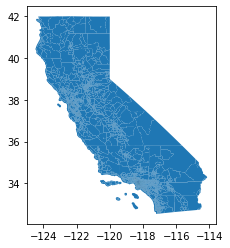

In [7]:
ax = gdf.plot()

In [8]:
counties = ["037", "059", "111"]
gdf_tracts = gdf[gdf["COUNTYFP"].isin(counties)]
gdf_tracts.shape

(3103, 13)

In [9]:
gdf_tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [10]:
df = pd.read_csv("/content/listings-la_oc_vc.csv")
df.shape

(1097, 5)

In [11]:
df.head()

,bedrooms,rent,sqft,longitude,latitude
0,NaN,2300.0,1450.0,-117.976770,33.836807
1,NaN,1075.0,NaN,-118.129403,34.141007
2,2.0,1595.0,932.0,-117.831739,33.870633
3,NaN,2720.0,1222.0,-118.338710,34.102056
4,2.0,1900.0,NaN,-118.537316,34.194225


In [12]:
gdf_listings = gpd.GeoDataFrame(df)
gdf_listings.shape

(1097, 5)

In [13]:
geometry = gpd.points_from_xy(x=gdf_listings["longitude"],
                              y=gdf_listings["latitude"])
gdf_listings["geometry"] = geometry
gdf_listings.crs = "epsg:4326"
gdf_listings.shape

(1097, 6)

In [14]:
gdf_listings.head()

,bedrooms,rent,sqft,longitude,latitude,geometry
0,NaN,2300.0,1450.0,-117.976770,33.836807,POINT (-117.97677 33.83681)
1,NaN,1075.0,NaN,-118.129403,34.141007,POINT (-118.12940 34.14101)
2,2.0,1595.0,932.0,-117.831739,33.870633,POINT (-117.83174 33.87063)
3,NaN,2720.0,1222.0,-118.338710,34.102056,POINT (-118.33871 34.10206)
4,2.0,1900.0,NaN,-118.537316,34.194225,POINT (-118.53732 34.19423)


In [15]:
gdf_listings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
gdf_tracts.crs == gdf_listings.crs

False

In [17]:
gdf_tracts = gdf_tracts.to_crs(gdf_listings.crs)
gdf_tracts.crs == gdf_listings.crs

True

how many tracts didn't intersect any rental listings?

In [18]:
unified_listings = gdf_listings["geometry"].unary_union
type(unified_listings)

shapely.geometry.multipoint.MultiPoint

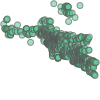

In [19]:
unified_listings

In [20]:
mask = gdf_tracts.intersects(unified_listings)
gdf_tracts[mask].shape

(656, 13)

In [21]:
gdf_tracts[~mask].shape

(2447, 13)

dissolve

In [22]:
gdf_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21963 34.02629, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."
5,06,037,206010,06037206010,2060.10,Census Tract 2060.10,G5020,S,1418138,20551,+34.0682177,-118.2320356,"POLYGON ((-118.23924 34.06726, -118.23800 34.0..."
6,06,037,206020,06037206020,2060.20,Census Tract 2060.20,G5020,S,843243,30290,+34.0571230,-118.2311021,"POLYGON ((-118.23787 34.05427, -118.23784 34.0..."


In [23]:
gdf_counties = gdf_tracts.dissolve("COUNTYFP", aggfunc="sum")
gdf_counties

,geometry,ALAND,AWATER
COUNTYFP,,,
037,"MULTIPOLYGON (((-118.57834 33.08624, -118.5649...",10510588451,1794793532
059,"POLYGON ((-117.58874 33.41540, -117.58882 33.4...",2048392529,406915886
111,"MULTIPOLYGON (((-119.60930 33.31823, -119.6048...",4773302741,946030569


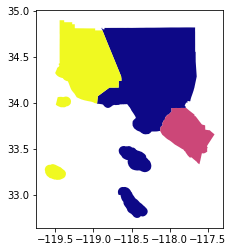

In [24]:
ax = gdf_counties.plot(cmap="plasma")

within

In [25]:
oc_geometry = gdf_counties.loc["059", "geometry"]
type(oc_geometry)

shapely.geometry.polygon.Polygon

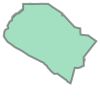

In [26]:
oc_geometry

In [27]:
mask = gdf_listings.within(oc_geometry)
oc_listings = gdf_listings[mask]
oc_listings.shape

(360, 6)

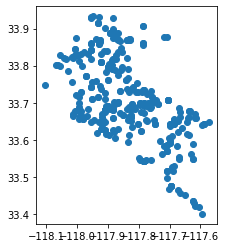

In [28]:
ax = oc_listings.plot()

In [29]:
oc_listings.head()

,bedrooms,rent,sqft,longitude,latitude,geometry
0,NaN,2300.0,1450.0,-117.976770,33.836807,POINT (-117.97677 33.83681)
2,2.0,1595.0,932.0,-117.831739,33.870633,POINT (-117.83174 33.87063)
6,1.0,1350.0,800.0,-117.954791,33.742979,POINT (-117.95479 33.74298)
7,2.0,1799.0,988.0,-117.883609,33.897940,POINT (-117.88361 33.89794)
10,1.0,3295.0,1825.0,-117.865620,33.774439,POINT (-117.86562 33.77444)


In [30]:
oc_listings_buffered = oc_listings.buffer(distance=0.1)  # what are these units? 0.1 what?
oc_listings_buffered.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     POLYGON ((-117.87677 33.83681, -117.87725 33.8...
2     POLYGON ((-117.73174 33.87063, -117.73222 33.8...
6     POLYGON ((-117.85479 33.74298, -117.85527 33.7...
7     POLYGON ((-117.78361 33.89794, -117.78409 33.8...
10    POLYGON ((-117.76562 33.77444, -117.76610 33.7...
dtype: geometry

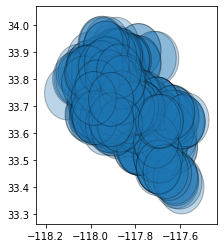

In [31]:
ax = oc_listings_buffered.plot(edgecolor="k", alpha=0.3)

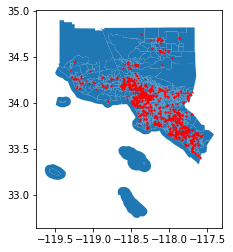

In [32]:
ax = gdf_tracts.plot()
ax = gdf_listings.plot(ax=ax, c="r", markersize=1)

In [33]:
usa_crs = "epsg:2163"
gdf_tracts = gdf_tracts.to_crs(usa_crs)
gdf_listings = gdf_listings.to_crs(usa_crs)

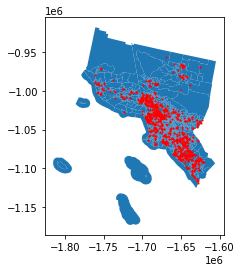

In [34]:
ax = gdf_tracts.plot()
ax = gdf_listings.plot(ax=ax, c="r", markersize=1)

In [35]:
utm_11 = "+proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
gdf_tracts = gdf_tracts.to_crs(utm_11)
gdf_listings = gdf_listings.to_crs(utm_11)

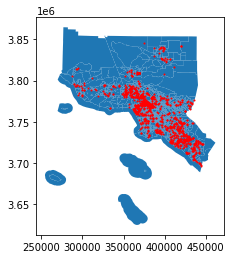

In [36]:
ax = gdf_tracts.plot()
ax = gdf_listings.plot(ax=ax, c="r", markersize=1)

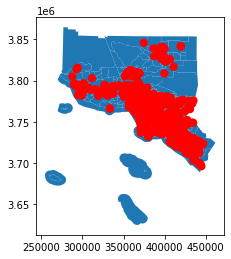

In [37]:
# buffer listings by 5km then plot again
ax = gdf_tracts.plot()
ax = gdf_listings.buffer(5000).plot(ax=ax, fc="r")

In [39]:
# load the CA tract-level census data from previous weeks
tract_indicators = pd.read_csv("/content/census_tracts_data_ca.csv", dtype={"GEOID10": str})
tract_indicators.shape

(8057, 28)

In [40]:
tract_indicators.head()

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
0,06001437701,3745.0,29.4,59.6,11.7,9.9,303.0,49.7,19.2,310700.0,4.0,6.8,76.5,2.1,3.51,1304.0,58197.0,30.5,64.3,11.9,15.7,93.8,11.5,35.5,38.6,6,1,Alameda
1,06001437102,4586.0,36.6,34.2,10.1,8.5,1813.0,45.8,28.0,384400.0,4.8,2.0,52.1,0.0,2.93,1530.0,72168.0,27.0,78.1,10.4,45.5,91.2,22.0,32.9,48.8,6,1,Alameda
2,06001437101,7186.0,40.2,20.6,13.9,5.9,3623.0,49.4,76.1,582400.0,5.9,0.4,16.8,6.9,3.93,2031.0,109435.0,31.4,75.6,3.1,34.5,90.0,40.0,46.1,42.3,6,1,Alameda
3,06001450752,5854.0,38.4,8.0,22.7,4.3,3514.0,51.2,80.5,1008600.0,7.8,0.6,14.0,10.2,3.19,2871.0,195250.0,46.5,60.1,1.4,15.9,94.5,65.7,44.2,44.5,6,1,Alameda
4,06001450751,8963.0,36.7,4.8,22.4,1.2,6020.0,48.7,77.4,922500.0,6.6,0.5,11.8,0.0,2.87,2768.0,194417.0,46.5,59.3,2.7,10.9,78.8,78.4,35.8,50.1,6,1,Alameda


In [41]:
gdf_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((388943.127 3764987.770, 388943.969 3..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((387400.850 3765741.082, 387420.402 3..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((387338.632 3765107.344, 387343.260 3..."
5,06,037,206010,06037206010,2060.10,Census Tract 2060.10,G5020,S,1418138,20551,+34.0682177,-118.2320356,"POLYGON ((385646.166 3770306.143, 385761.152 3..."
6,06,037,206020,06037206020,2060.20,Census Tract 2060.20,G5020,S,843243,30290,+34.0571230,-118.2311021,"POLYGON ((385755.167 3768864.610, 385757.936 3..."


In [42]:
# merge the 2 datasets on a shared column: tract fips code
gdf_tracts_ind = pd.merge(left=gdf_tracts,
                          right=tract_indicators,
                          how="left",
                          left_on="GEOID",
                          right_on="GEOID10")
gdf_tracts_ind.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
0,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((388943.127 3764987.770, 388943.969 3...",06037204920,2723.0,35.5,96.5,2.9,0.6,0.0,53.5,81.9,350000.0,4.3,45.9,52.6,3.3,4.30,1042.0,40871.0,24.4,86.4,28.3,19.0,91.7,8.7,14.0,39.9,6,37,Los Angeles
1,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((387400.850 3765741.082, 387420.402 3...",06037205110,3916.0,28.1,94.8,1.7,0.3,127.0,50.7,2.5,NaN,3.9,74.9,100.0,5.1,4.65,1193.0,43063.0,29.4,57.4,29.4,20.9,90.8,5.9,6.5,53.1,6,37,Los Angeles
2,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((387338.632 3765107.344, 387343.260 3...",06037205120,3428.0,34.9,94.4,1.1,3.1,49.0,39.6,22.7,328800.0,4.0,68.6,85.8,1.2,3.44,973.0,28558.0,27.5,72.3,35.5,23.2,91.2,4.8,10.4,47.9,6,37,Los Angeles
3,06,037,206010,06037206010,2060.10,Census Tract 2060.10,G5020,S,1418138,20551,+34.0682177,-118.2320356,"POLYGON ((385646.166 3770306.143, 385761.152 3...",06037206010,3586.0,38.4,56.7,7.8,2.7,1137.0,49.1,17.8,531700.0,3.8,27.0,88.9,2.2,3.23,912.0,27669.0,31.2,49.6,38.7,21.4,94.0,13.6,22.3,49.4,6,37,Los Angeles
4,06,037,206020,06037206020,2060.20,Census Tract 2060.20,G5020,S,843243,30290,+34.0571230,-118.2311021,"POLYGON ((385755.167 3768864.610, 385757.936 3...",06037206020,8116.0,33.0,42.4,19.0,32.5,196.0,93.8,4.1,NaN,2.9,5.1,100.0,2.7,1.96,2297.0,96719.0,36.3,54.0,15.2,52.9,41.2,7.3,60.8,11.1,6,37,Los Angeles


In [43]:
gdf_tracts_ind.crs

<Projected CRS: +proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
gdf_listings.crs == gdf_counties.crs

False

In [45]:
gdf_counties = gdf_counties.to_crs(gdf_listings.crs)
gdf_listings.crs == gdf_counties.crs

True

In [46]:
gdf_listings_counties = gpd.sjoin(gdf_listings, gdf_counties, how="left", op="within")
gdf_listings_counties.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


(1097, 9)

In [47]:
gdf_listings_counties.head()

,bedrooms,rent,sqft,longitude,latitude,geometry,index_right,ALAND,AWATER
0,NaN,2300.0,1450.0,-117.976770,33.836807,POINT (409623.602 3744490.687),059,2048392529,406915886
1,NaN,1075.0,NaN,-118.129403,34.141007,POINT (395872.216 3778366.755),037,10510588451,1794793532
2,2.0,1595.0,932.0,-117.831739,33.870633,POINT (423073.433 3748123.368),059,2048392529,406915886
3,NaN,2720.0,1222.0,-118.338710,34.102056,POINT (376516.869 3774280.739),037,10510588451,1794793532
4,2.0,1900.0,NaN,-118.537316,34.194225,POINT (358349.816 3784759.737),037,10510588451,1794793532


In [48]:
gdf_listings_counties = gdf_listings_counties.rename(columns={"index_right": "county"})
gdf_listings_counties.head()

,bedrooms,rent,sqft,longitude,latitude,geometry,county,ALAND,AWATER
0,NaN,2300.0,1450.0,-117.976770,33.836807,POINT (409623.602 3744490.687),059,2048392529,406915886
1,NaN,1075.0,NaN,-118.129403,34.141007,POINT (395872.216 3778366.755),037,10510588451,1794793532
2,2.0,1595.0,932.0,-117.831739,33.870633,POINT (423073.433 3748123.368),059,2048392529,406915886
3,NaN,2720.0,1222.0,-118.338710,34.102056,POINT (376516.869 3774280.739),037,10510588451,1794793532
4,2.0,1900.0,NaN,-118.537316,34.194225,POINT (358349.816 3784759.737),037,10510588451,1794793532


In [49]:
groups = gdf_listings_counties.groupby("county")

In [50]:
groups["rent"].median().sort_values(ascending=False)

county
059    1777.5
037    1698.5
111    1697.0
Name: rent, dtype: float64

In [51]:
groups["bedrooms"].mean().sort_values(ascending=False)

county
037    1.993197
059    1.953846
111    1.914894
Name: bedrooms, dtype: float64

In [52]:
groups["geometry"].count().sort_values(ascending=False)

county
037    685
059    360
111     52
Name: geometry, dtype: int64

In [53]:
oc_listings = gdf_listings_counties[gdf_listings_counties["county"] == "059"]
oc_listings.shape

(360, 9)

In [54]:
oc_tracts_ind = gdf_tracts_ind[gdf_tracts_ind["COUNTYFP"] == "059"]
oc_tracts_ind.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
168,06,059,990100,06059990100,9901,Census Tract 9901,G5020,S,0,352603583,+33.5333068,-117.8559677,"POLYGON ((395655.443 3729146.347, 395655.715 3...",06059990100,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,59,Orange
169,06,059,062649,06059062649,626.49,Census Tract 626.49,G5020,S,3369929,8846,+33.6016816,-117.7535469,"POLYGON ((429326.428 3716338.685, 429329.490 3...",06059062649,3285.0,66.4,12.8,69.8,1.8,474.0,42.0,13.8,419600.0,4.4,1.3,40.5,2.6,1.80,1875.0,50236.0,29.3,79.6,13.5,62.5,84.0,53.0,74.0,28.5,6,59,Orange
170,06,059,032058,06059032058,320.58,Census Tract 320.58,G5020,S,5975932,0,+33.5418916,-117.6442558,"POLYGON ((438472.608 3711227.859, 438509.456 3...",06059032058,8779.0,33.5,14.2,67.5,3.8,896.0,48.1,65.4,804300.0,7.1,0.0,14.8,0.0,3.43,2468.0,164909.0,31.3,76.3,1.2,11.7,82.5,68.4,76.5,14.5,6,59,Orange
171,06,059,032061,06059032061,320.61,Census Tract 320.61,G5020,S,9605979,0,+33.5238256,-117.6466197,"POLYGON ((437805.724 3710000.519, 437816.488 3...",06059032061,3816.0,52.3,8.0,82.8,0.4,177.0,48.2,74.9,1303100.0,7.7,0.7,4.6,0.0,3.16,2775.0,151723.0,29.1,78.3,2.6,23.6,88.9,62.4,92.4,12.7,6,59,Orange
566,06,059,021813,06059021813,218.13,Census Tract 218.13,G5020,S,4073720,622433,+33.8581232,-117.8046708,"POLYGON ((422479.956 3745965.218, 422481.016 3...",06059021813,100.0,29.3,55.0,11.0,0.0,0.0,71.0,12.5,NaN,5.0,0.0,87.5,0.0,3.29,NaN,NaN,NaN,90.2,0.0,NaN,15.7,5.7,64.3,0.0,6,59,Orange


In [56]:
oc_tracts_ind = oc_tracts_ind[oc_tracts_ind["ALAND"] > 0]

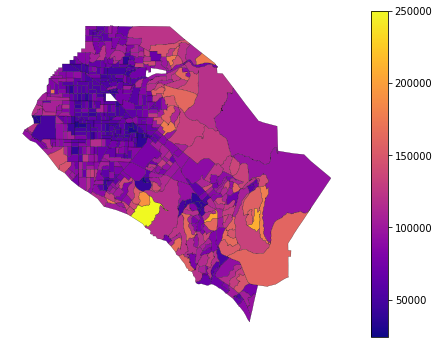

In [57]:
ax = oc_tracts_ind.plot(column="med_household_income",
                        cmap="plasma",
                        edgecolor="k",
                        lw=0.2,
                        figsize=(9, 6),
                        legend=True)

# turn the "axis" off and save to disk
ax.axis("off")
ax.get_figure().savefig("oc-income.png", dpi=300, bbox_inches="tight")

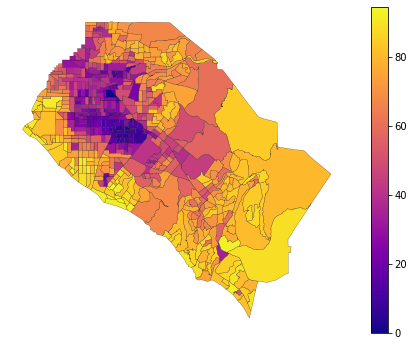

In [58]:
ax = oc_tracts_ind.plot(column="pct_english_only",
                        cmap="plasma",
                        edgecolor="k",
                        lw=0.2,
                        figsize=(9, 6),
                        legend=True)
ax.axis("off")
ax.get_figure().savefig("oc-language.png", dpi=300, bbox_inches="tight")

In [60]:
!pip install mapclassify

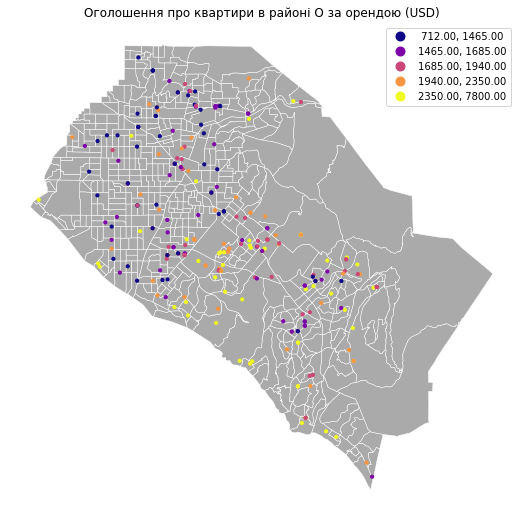

In [62]:
ax = oc_tracts_ind.plot(facecolor="#aaaaaa", edgecolor="w", lw=0.5, figsize=(12, 9), legend=False)

# now plot listings, colored by asking rent
ax = oc_listings.dropna().plot(ax=ax,
                               markersize=10,
                               legend=True,
                               cmap="plasma",
                               column="rent",
                               scheme="Quantiles")
ax.axis("off")
ax.set_title("Оголошення про квартири в районі O за орендою (USD)")
ax.get_figure().savefig("oc-listings.png", dpi=300, bbox_inches="tight")